In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.stats import linregress
warnings.simplefilter("ignore")
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = True

/Applications/anaconda3/envs/mude/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from HBVMod_LL import HBVMod

In [3]:
df = pd.read_csv('PRECIPITATION.csv', delimiter=';', skiprows=1, header=None)
df[['Date', 'PRCP']] = df[0].str.split(';', expand=True)
df = df.drop(columns=[0])
df["PRCP"] = df["PRCP"].astype(float)

In [4]:
df2 = pd.read_csv('POT_EV.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'POT_EV']
df2.columns = column_names
df2["POT_EV"] = df2["POT_EV"].astype(float)

In [5]:
df_tot = pd.concat([df["Date"], df["PRCP"], df2["POT_EV"]], axis = 1)

In [6]:
df_tot

,Date,PRCP,POT_EV
0,2020-01-01,0.0712,6.2283
1,2020-01-02,0.0078,6.4056
2,2020-01-03,0.0444,6.8320
3,2020-01-04,0.0000,7.0333
4,2020-01-05,0.0644,6.8688
...,...,...,...
1453,2023-12-28,0.9385,4.2767
1454,2023-12-29,13.9013,2.8843
1455,2023-12-30,0.0178,5.0612
1456,2023-12-31,0.0222,5.8407


2.1458390619955026e-12


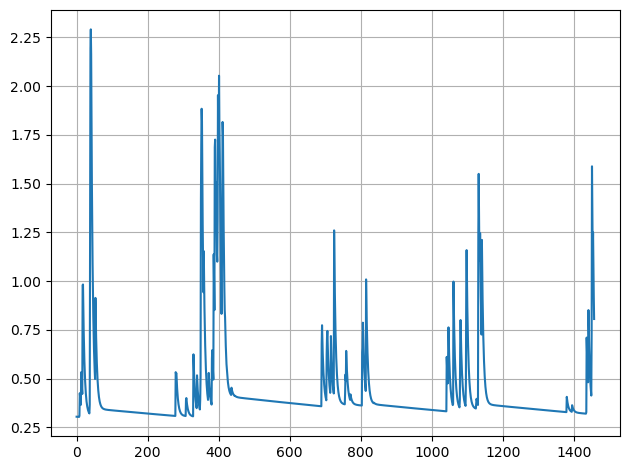

In [17]:
Par = np.array([5,   .7,  10,   4,    .2,  .0005])
              #Si, Su,   Sf, S
Sin= np.array([0,  100,  0,  5  ])

PRCP = df["PRCP"]
POT_EV = df2["POT_EV"]
#forcing= forcing[:,3:6]


Qm = HBVMod(Par,PRCP, POT_EV,Sin,hydrograph='True')


In [18]:
date = pd.to_datetime(df["Date"])

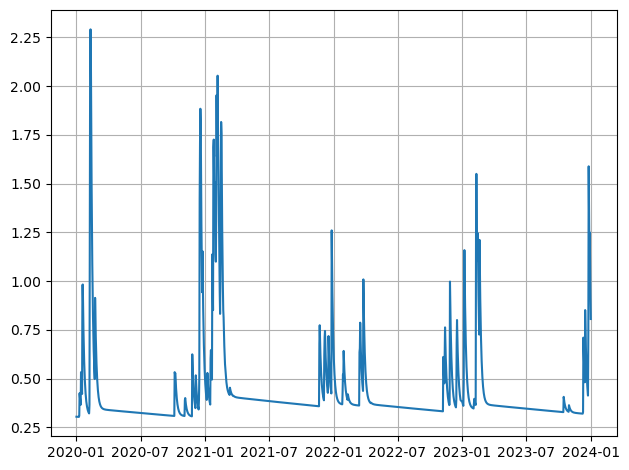

In [19]:
plt.plot(date, Qm)